In [62]:
#importing necessary packages
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.preprocessing import StandardScaler,LabelEncoder
import seaborn as sns
import warnings 
warnings.simplefilter("ignore")

In [63]:
car_data = pd.read_csv("/content/CarPrice.csv")  #reading dataset file

In [64]:
car_data.head()  #prints first 5 rows

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [65]:
car_data.tail()  #prints last 5 rows

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0
204,205,-1,volvo 264gl,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,19,25,22625.0


In [66]:
car_data.shape  # (m,n) m = no of rows , n = no of columns

(205, 26)

In [67]:
car_data.isnull().sum()  # checking for null values

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

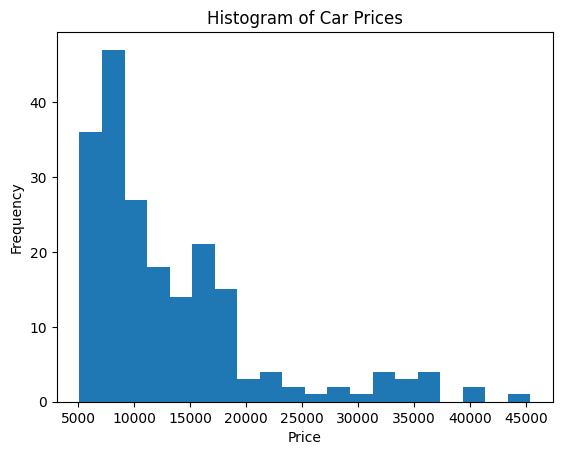

In [68]:
plt.hist(car_data['price'], bins=20)
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Histogram of Car Prices')
plt.show()


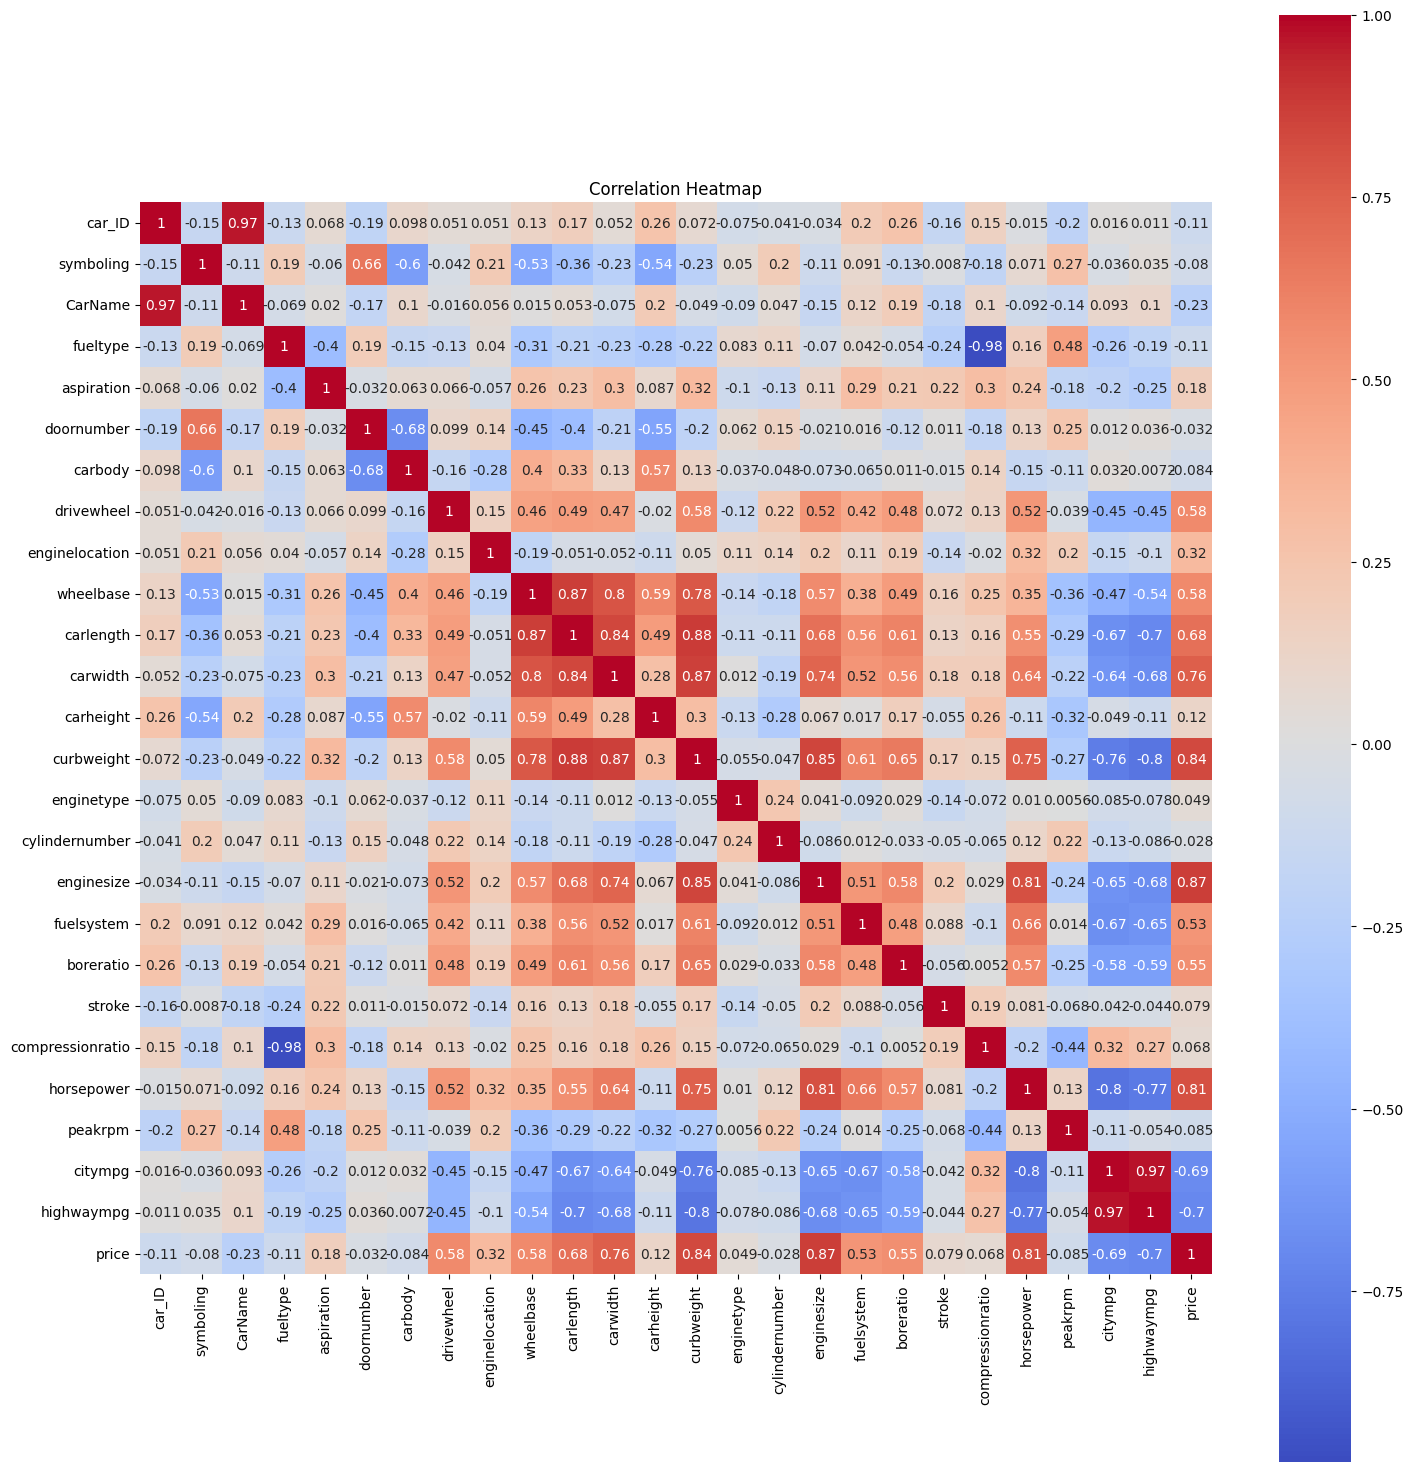

In [81]:
corr_matrix = car_data.corr()
fig, ax = plt.subplots(figsize=(15, 15))
sns.heatmap(corr_matrix, cmap='coolwarm', annot=True, square=True)
plt.title('Correlation Heatmap')
plt.tight_layout()
plt.show()




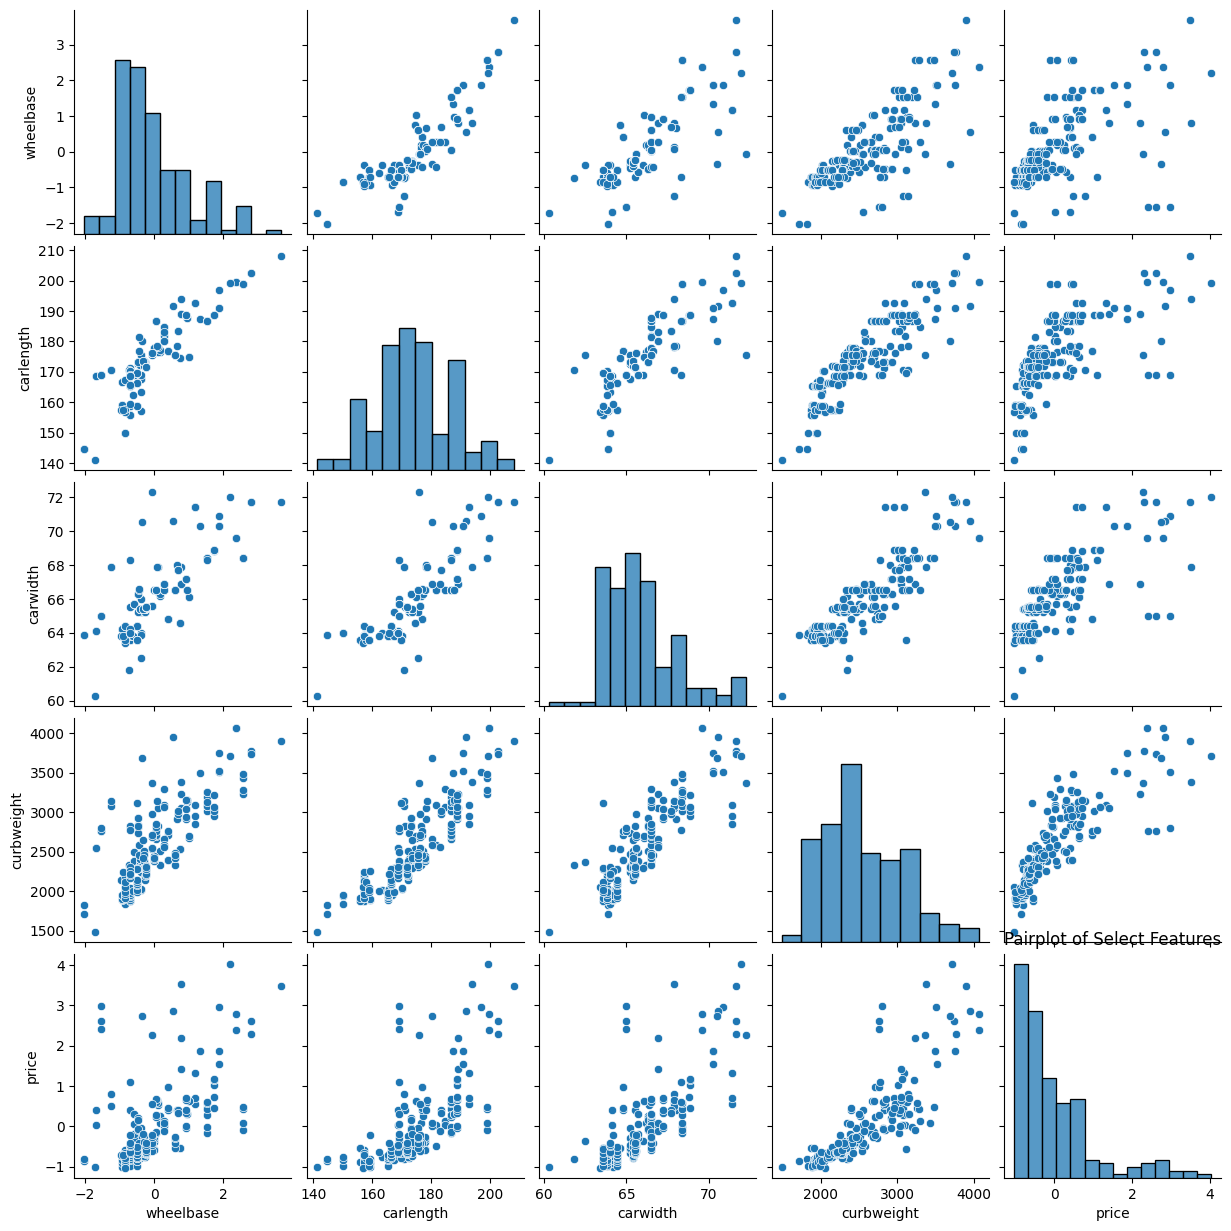

In [82]:
sns.pairplot(car_data[['wheelbase', 'carlength', 'carwidth', 'curbweight', 'price']])
plt.title('Pairplot of Select Features')
plt.show()


In [69]:
label_encoder = LabelEncoder()   # Transforming text into numeric values
car_data["CarName"] = label_encoder.fit_transform(car_data["CarName"])
car_data["fueltype"] = label_encoder.fit_transform(car_data["fueltype"])
car_data["aspiration"] = label_encoder.fit_transform(car_data["aspiration"])
car_data["doornumber"] = label_encoder.fit_transform(car_data["doornumber"])
car_data["carbody"] = label_encoder.fit_transform(car_data["carbody"])
car_data["drivewheel"] = label_encoder.fit_transform(car_data["drivewheel"])
car_data["enginelocation"] = label_encoder.fit_transform(car_data["enginelocation"])
car_data["fuelsystem"] = label_encoder.fit_transform(car_data["fuelsystem"])
car_data["cylindernumber"] = label_encoder.fit_transform(car_data["cylindernumber"])
car_data["enginetype"] = label_encoder.fit_transform(car_data["enginetype"])
car_data.head()



,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,2,1,0,1,0,2,0,88.6,...,130,5,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,3,1,0,1,0,2,0,88.6,...,130,5,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,1,1,0,1,2,2,0,94.5,...,152,5,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,4,1,0,0,3,1,0,99.8,...,109,5,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,5,1,0,0,3,0,0,99.4,...,136,5,3.19,3.40,8.0,115,5500,18,22,17450.0


In [70]:
scaler = StandardScaler()      #scaling the columns which are having higher values
scale_features = ["wheelbase","enginesize","horsepower","peakrpm","citympg","highwaympg","price"]
for feature in scale_features:
    car_data[feature] = scaler.fit_transform(car_data[feature].values.reshape(-1,1))
car_data.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,2,1,0,1,0,2,0,-1.690772,...,0.074449,5,3.47,2.68,9.0,0.174483,-0.262960,-0.646553,-0.546059,0.027391
1,2,3,3,1,0,1,0,2,0,-1.690772,...,0.074449,5,3.47,2.68,9.0,0.174483,-0.262960,-0.646553,-0.546059,0.404461
2,3,1,1,1,0,1,2,2,0,-0.708596,...,0.604046,5,2.68,3.47,9.0,1.264536,-0.262960,-0.953012,-0.691627,0.404461
3,4,2,4,1,0,0,3,1,0,0.173698,...,-0.431076,5,3.19,3.40,10.0,-0.053668,0.787855,-0.186865,-0.109354,0.084485
4,5,2,5,1,0,0,3,0,0,0.107110,...,0.218885,5,3.19,3.40,8.0,0.275883,0.787855,-1.106241,-1.273900,0.523668


In [71]:
car_data.dtypes  # checking for data types of each column

car_ID                int64
symboling             int64
CarName               int64
fueltype              int64
aspiration            int64
doornumber            int64
carbody               int64
drivewheel            int64
enginelocation        int64
wheelbase           float64
carlength           float64
carwidth            float64
carheight           float64
curbweight            int64
enginetype            int64
cylindernumber        int64
enginesize          float64
fuelsystem            int64
boreratio           float64
stroke              float64
compressionratio    float64
horsepower          float64
peakrpm             float64
citympg             float64
highwaympg          float64
price               float64
dtype: object

In [72]:
X = car_data.drop("price",axis=1)     #splitting the data
Y = car_data['price']
print(X)
print(Y)

     car_ID  symboling  CarName  fueltype  aspiration  doornumber  carbody  \
0         1          3        2         1           0           1        0   
1         2          3        3         1           0           1        0   
2         3          1        1         1           0           1        2   
3         4          2        4         1           0           0        3   
4         5          2        5         1           0           0        3   
..      ...        ...      ...       ...         ...         ...      ...   
200     201         -1      139         1           0           0        3   
201     202         -1      138         1           1           0        3   
202     203         -1      140         1           0           0        3   
203     204         -1      142         0           1           0        3   
204     205         -1      143         1           1           0        3   

     drivewheel  enginelocation  wheelbase  ...  cylindernumber

In [73]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2,random_state=1)

In [74]:
model = KNeighborsRegressor(n_neighbors=5)  

In [75]:
model.fit(X_train,Y_train)

KNeighborsRegressor()

In [76]:
train_data_prediction = model.predict(X_train)
test_data_prediction = model.predict(X_test)
train_mse_score = mean_squared_error(Y_train,train_data_prediction)
train_r2_score = r2_score(Y_train,train_data_prediction)
print("Training data metrics scores")
print("mean_squared_error = ",train_mse_score)
print("r2_score = ",train_r2_score)
print("Test data metric scores")
test_mse_score = mean_squared_error(Y_test,test_data_prediction)
print("mean_squared_error = ",test_mse_score)
test_r2_score = r2_score(Y_test,test_data_prediction)
print("r2_score = ",test_r2_score)


Training data metrics scores
mean_squared_error =  0.16645192224614166
r2_score =  0.8379898999355448
Test data metric scores
mean_squared_error =  0.16122541627978307
r2_score =  0.8136597234294431


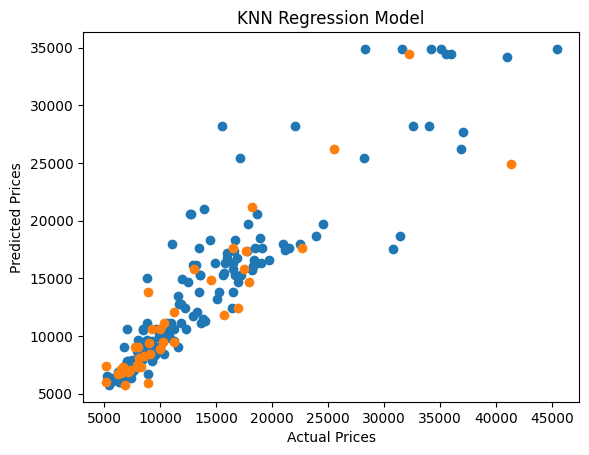

In [77]:
train_data_prediction = scaler.inverse_transform(train_data_prediction.reshape(1,-1))
test_data_prediction = scaler.inverse_transform(test_data_prediction.reshape(1,-1))
plt.scatter(scaler.inverse_transform(Y_train.values.reshape(1,-1)), train_data_prediction, label='Training Data')
plt.scatter(scaler.inverse_transform(Y_test.values.reshape(1,-1)), test_data_prediction, label='Testing Data')
plt.title('KNN Regression Model')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.show()
